# 0.Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets
plt.style.use('seaborn-v0_8-darkgrid')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1.Helper Functions

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1- sigmoid(x))

# 2.Input, Target & Weights

In [3]:
# Input data
x = np.array([0.1, 0.3])

# Target
y = 0.2

# Input to output weights
weights = np.array([-0.8, 0.5])

# The learning rate, eta in the weight step equation
learnrate = 0.6

# 3.Step by Step Gradient Descent

In [4]:
h = np.dot(x,weights)
h

0.06999999999999998

In [5]:
prediction = sigmoid(h)
prediction

0.5174928576663897

In [6]:
error = y - prediction
error

-0.31749285766638974

In [7]:
# output gradient (f'(h))
output_grad = sigmoid_prime(h)
output_grad

0.24969399993066344

In [8]:
# error term (lowercase delta)
error_term = error * output_grad
error_term

-0.07927606158013766

In [9]:
# Gradient descent step 
del_w = [ learnrate  *error_term*  x[0],
          learnrate  *error_term*  x[1]]
# or del_w = learnrate  *error_term*  x

del_w

[-0.00475656369480826, -0.014269691084424777]

In [10]:
weights += np.dot(del_w,learnrate) / 2 
weights

array([-0.80142697,  0.49571909])

In [11]:
new_prediction = sigmoid(np.dot(x,weights))
new_prediction

0.5171365432081484

# 4.Gradient Descent Steps in a loop

In [12]:
prediction_list=[]
for i in range(2000):
    h = np.dot(x,weights)
    prediction = sigmoid(h)
    error = y - prediction
    output_grad = sigmoid_prime(h)
    error_term = error * output_grad
    del_w = [ learnrate  *error_term*  x[0],
          learnrate  *error_term*  x[1]]
    weights += np.dot(del_w,learnrate) / 2 
    new_prediction = sigmoid(np.dot(x,weights))
    prediction_list.append(new_prediction)

**In the graph below, you can see that with each iteration our predictions come closer to the target (0.2)**

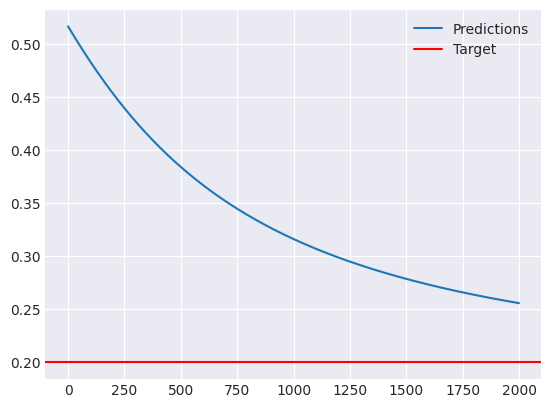

In [13]:
plt.plot(prediction_list)
# specifying horizontal line type 
plt.axhline(y = 0.2, color = 'r', linestyle = '-') 
plt.legend(['Predictions','Target'])
plt.show()